<a href="https://colab.research.google.com/github/egecnoob/IA_1/blob/main/Regrecion_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Machine Learning - Regresión Lineal  

La regresión lineal es un método de aprendizaje automático supervisado utilizado por la herramienta Entrenar con AutoML y busca una ecuación lineal que describe mejor la correlación de las variables explicativas con la variable dependiente. Se logra ajustando una línea a los datos mediante mínimos cuadrados.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

datos = pd.read_csv("DatosJaimePapu.csv")

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PrecioCasa       103 non-null    int64
 1   Metros2          103 non-null    int64
 2   Habitaciones     103 non-null    int64
 3   EdadEdificacion  103 non-null    int64
 4   PrecioAutovaluo  103 non-null    int64
 5   Garaje           103 non-null    int64
dtypes: int64(6)
memory usage: 5.0 KB


In [ ]:
datos.head()

,PrecioCasa,Metros2,Habitaciones,EdadEdificacion,PrecioAutovaluo,Garaje
0,15067,5,4,33,2430,1
1,46022,10,4,31,7942,1
2,22760,14,2,8,4008,0
3,26184,19,2,21,7866,0
4,61199,7,3,70,3632,0


In [ ]:
#convertir al dataframe de pandas
df = pd.DataFrame(datos)

In [ ]:

X = df.drop(columns=["PrecioCasa"])
y = df["PrecioCasa"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

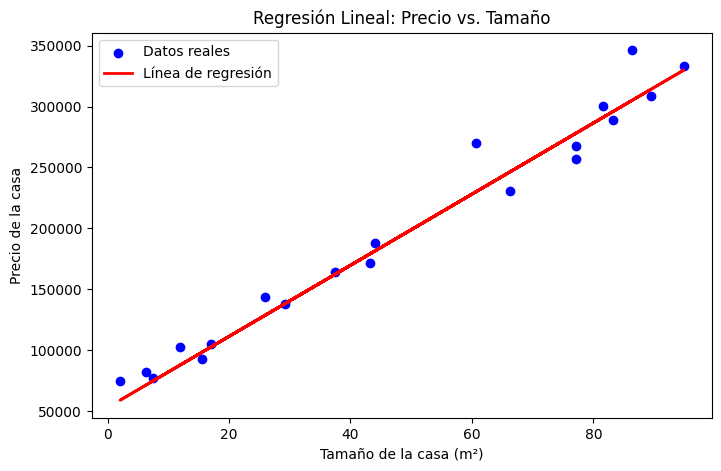

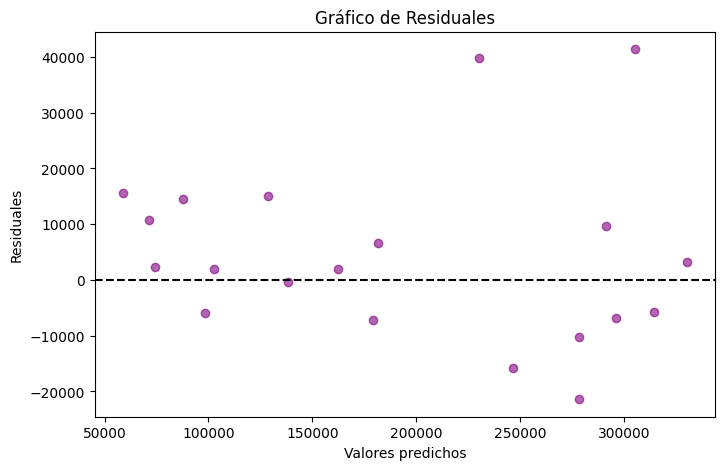

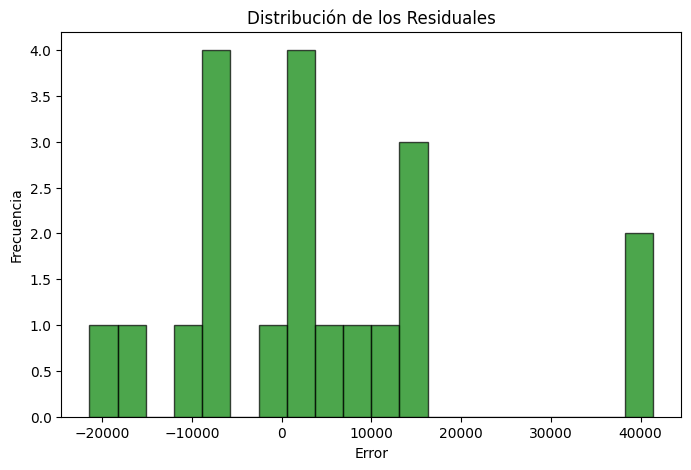

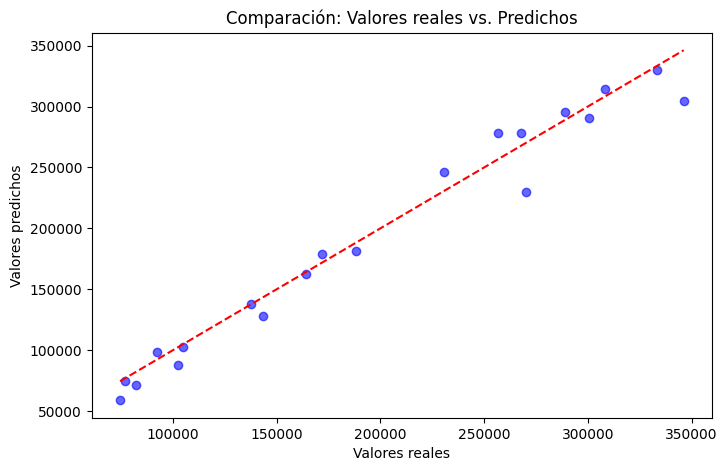

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Gráfico 1: Dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Línea de regresión")
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio de la casa")
plt.title("Regresión Lineal: Precio vs. Tamaño")
plt.legend()
plt.show()

# Gráfico 2: Residuales vs. Valores ajustados
residuales = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuales, color="purple", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales")
plt.show()

# Gráfico 3: Histograma de residuales
plt.figure(figsize=(8, 5))
plt.hist(residuales, bins=20, color="green", edgecolor="black", alpha=0.7)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuales")
plt.show()

# Gráfico 4: Comparación de valores reales y predichos
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación: Valores reales vs. Predichos")
plt.show()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Model Performance:
Mean Absolute Error (MAE): 22048.02042751782
Root Mean Squared Error (RMSE): 23853.49474225376


In [ ]:
# Example prediction
new_house = np.array([[9, 3, 16, 8712, 0]])  # Example house data
predicted_price = model.predict(new_house)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $35,075.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
